In [40]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [41]:
full = DirHistory.load('data/history/None.pkl')
medium = DirHistory.load('data/history/Medium.pkl')
simple = DirHistory.load('data/history/Simple.pkl')

## Simple Model Exploration

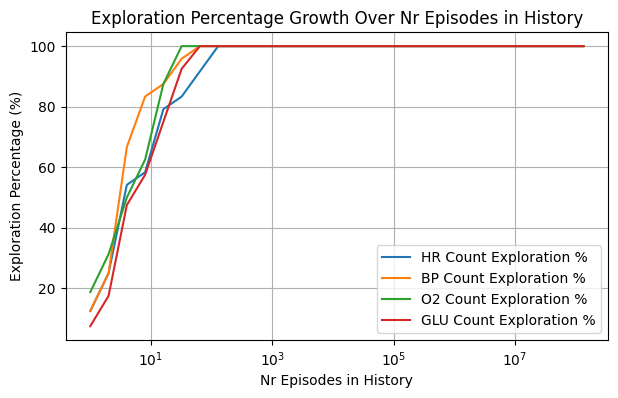

In [42]:
exploration_data = {vs: [] for vs in ['HR', 'BP', 'O2', 'GLU']}
iterations = list(simple.state_counts.keys()) 
values = [[Level.LOW.value, Level.NORMAL.value, Level.HIGH.value],
          [Level.LOW.value, Level.NORMAL.value, Level.HIGH.value],
            [Level.LOW.value, Level.NORMAL.value,],
            [Level.SUPER_LOW.value, Level.LOW.value, Level.NORMAL.value, Level.HIGH.value, Level.SUPER_HIGH.value]]

for iteration in iterations:
    for i, vs in enumerate(['HR', 'BP', 'O2', 'GLU']):
        state_vals = values[i]
        exploration_per_input = {}
        for state in state_vals:
            for action in ACTIONS:
                exploration_per_input[(state, action)] = np.sum([simple.state_counts[iteration][i][(state, action, next_s)] for next_s in state_vals]) / len(state_vals)

        flat = np.array(list(exploration_per_input.values()))
        # incorporate sums
        explored_percentage = len(flat[flat > 1]) / len(flat) * 100 
        exploration_data[vs].append(explored_percentage)


plt.figure(figsize=(7, 4))

for vs in ['HR', 'BP', 'O2', 'GLU']:
    plt.plot(iterations, exploration_data[vs], label=f"{vs} Count Exploration %")

plt.xlabel('Nr Episodes in History')
plt.ylabel('Exploration Percentage (%)')
plt.title('Exploration Percentage Growth Over Nr Episodes in History')
plt.legend()
plt.xscale('log', base=10)
plt.grid(True)

plt.show()


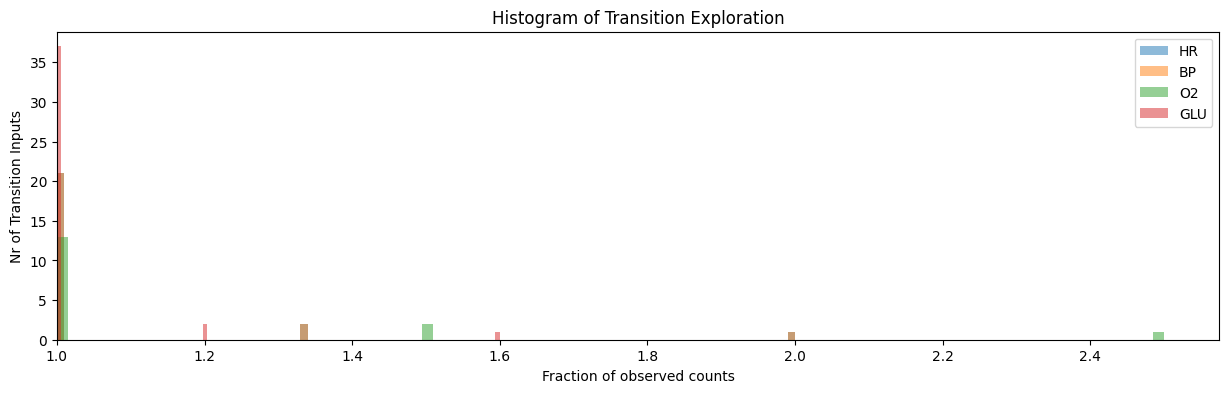

In [43]:

iterations = list(simple.state_counts.keys()) 
inp_vals = [HR_STATES, BP_STATES, O2_STATES, GLU_STATES]

plt.figure(figsize=(15, 4))

for i, vs in enumerate(['HR', 'BP', 'O2', 'GLU']):
    state_vals = values[i]
    exploration_per_input = {}
    for state in state_vals:
        for action in ACTIONS:
            exploration_per_input[(state, action)] = np.sum([simple.state_counts[iterations[0]][i][(state, action, next_s)] for next_s in state_vals]) / len(state_vals)

    plt.hist(exploration_per_input.values(), bins=100, alpha=0.5, label=f"{vs}")  # Plot the histogram


plt.xlabel('Fraction of observed counts')
plt.ylabel('Nr of Transition Inputs')
plt.title('Histogram of Transition Exploration')
plt.legend()
# plt.grid(True)
# plt.xscale('log', base=10)
plt.xlim(left=1)

plt.show()


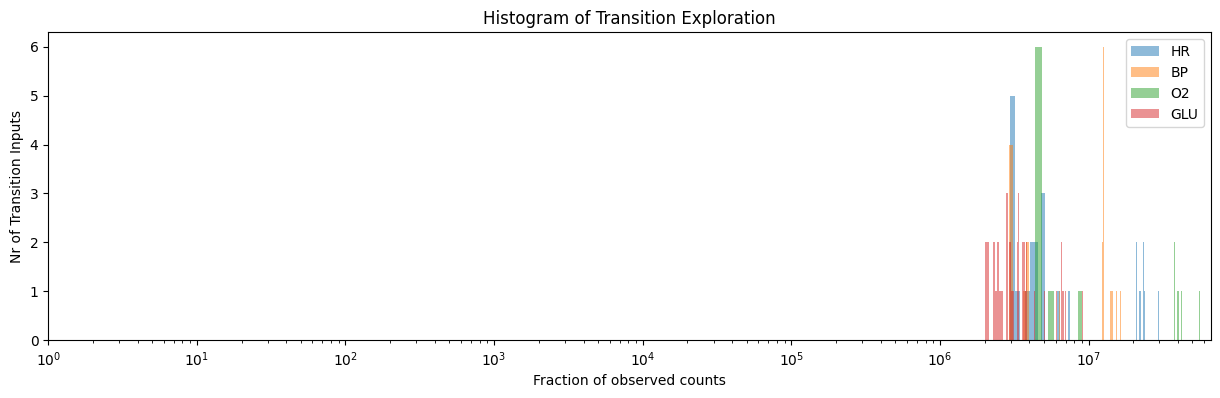

In [44]:

iterations = list(simple.state_counts.keys()) 
inp_vals = [HR_STATES, BP_STATES, O2_STATES, GLU_STATES]

plt.figure(figsize=(15, 4))

for i, vs in enumerate(['HR', 'BP', 'O2', 'GLU']):
    state_vals = values[i]
    exploration_per_input = {}
    for state in state_vals:
        for action in ACTIONS:
            exploration_per_input[(state, action)] = np.sum([simple.state_counts[iterations[-1]][i][(state, action, next_s)] for next_s in state_vals]) / len(state_vals)

    plt.hist(exploration_per_input.values(), bins=100, alpha=0.5, label=f"{vs}")  # Plot the histogram


plt.xlabel('Fraction of observed counts')
plt.ylabel('Nr of Transition Inputs')
plt.title('Histogram of Transition Exploration')
plt.legend()
# plt.grid(True)
plt.xscale('log', base=10)
plt.xlim(left=1)

plt.show()


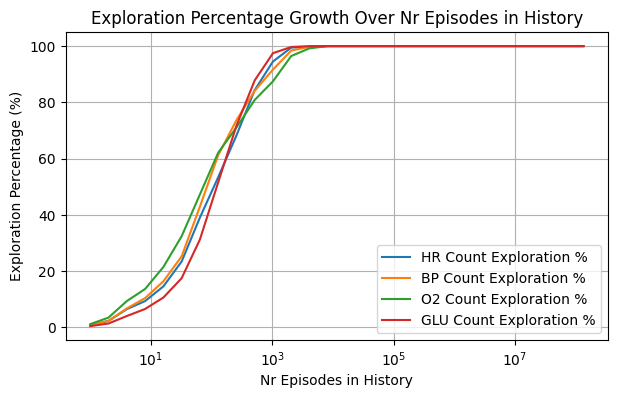

In [45]:
exploration_data = {vs: [] for vs in ['HR', 'BP', 'O2', 'GLU']}
iterations = list(medium.state_counts.keys()) 
inp_vals = [HR_STATES, BP_STATES, O2_STATES, GLU_STATES]
values = [[Level.LOW.value, Level.NORMAL.value, Level.HIGH.value],
          [Level.LOW.value, Level.NORMAL.value, Level.HIGH.value],
            [Level.LOW.value, Level.NORMAL.value,],
            [Level.SUPER_LOW.value, Level.LOW.value, Level.NORMAL.value, Level.HIGH.value, Level.SUPER_HIGH.value]]

for iteration in iterations:
    for i, vs in enumerate(['HR', 'BP', 'O2', 'GLU']):
        state_vals = values[i]
        exploration_per_input = {}
        for state in inp_vals[i]:
            for action in ACTIONS:
                exploration_per_input[(state, action)] = np.sum([medium.state_counts[iteration][i][(state, action, next_s)] for next_s in state_vals]) / len(state_vals)

        flat = np.array(list(exploration_per_input.values()))
        # incorporate sums
        explored_percentage = len(flat[flat > 1]) / len(flat) * 100 
        exploration_data[vs].append(explored_percentage)


plt.figure(figsize=(7, 4))

for vs in ['HR', 'BP', 'O2', 'GLU']:
    plt.plot(iterations, exploration_data[vs], label=f"{vs} Count Exploration %")

plt.xlabel('Nr Episodes in History')
plt.ylabel('Exploration Percentage (%)')
plt.title('Exploration Percentage Growth Over Nr Episodes in History')
plt.legend()
plt.xscale('log', base=10)
plt.grid(True)

plt.show()


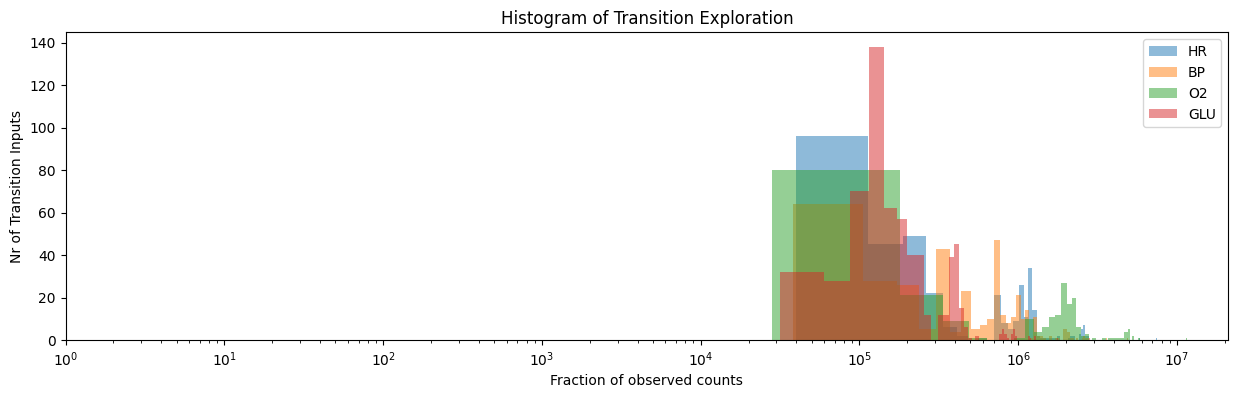

In [46]:

iterations = list(medium.state_counts.keys()) 
inp_vals = [HR_STATES, BP_STATES, O2_STATES, GLU_STATES]
values = [[Level.LOW.value, Level.NORMAL.value, Level.HIGH.value],
          [Level.LOW.value, Level.NORMAL.value, Level.HIGH.value],
            [Level.LOW.value, Level.NORMAL.value,],
            [Level.SUPER_LOW.value, Level.LOW.value, Level.NORMAL.value, Level.HIGH.value, Level.SUPER_HIGH.value]]

plt.figure(figsize=(15, 4))

for i, vs in enumerate(['HR', 'BP', 'O2', 'GLU']):
    state_vals = values[i]
    exploration_per_input = {}
    for state in inp_vals[i]:
        for action in ACTIONS:
            exploration_per_input[(state, action)] = np.sum([medium.state_counts[iterations[-1]][i][(state, action, next_s)] for next_s in state_vals]) / len(state_vals)

    plt.hist(exploration_per_input.values(), bins=100, alpha=0.5, label=f"{vs}")  # Plot the histogram

plt.xlabel('Fraction of observed counts')
plt.ylabel('Nr of Transition Inputs')
plt.title('Histogram of Transition Exploration')
plt.legend()
# plt.grid(True)
plt.xscale('log', base=10)
plt.xlim(left=1)

plt.show()



## Full Transition Model Exploration

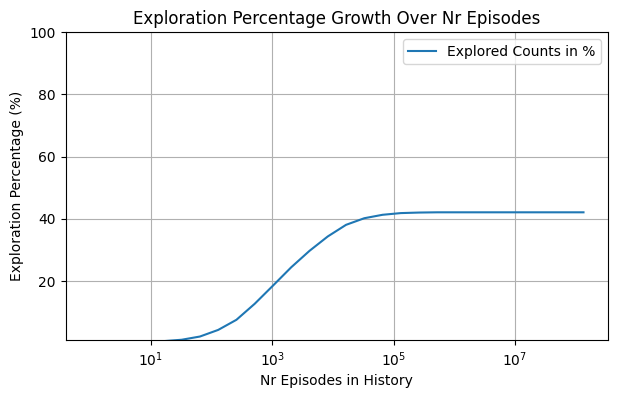

In [47]:

exploration_data = []
iterations = list(full.state_counts.keys()) 

for iteration in iterations:
    exploration_per_input = {}
    exploration_per_input = {(i,j): np.sum(full.state_counts[iteration][i,j]) / n_states for i in range(n_states) for j in range(n_actions)}
    flat = np.array(list(exploration_per_input.values()))
    # incorporate sums
    explored_percentage = len(flat[flat > 1]) / len(flat) * 100 
    exploration_data.append(explored_percentage)

plt.figure(figsize=(7, 4))

plt.plot(iterations, exploration_data, label=f"Explored Counts in %")

plt.xlabel('Nr Episodes in History')
plt.ylabel('Exploration Percentage (%)')
plt.title('Exploration Percentage Growth Over Nr Episodes')
plt.legend()
plt.grid(True)
plt.ylim(1, 100)
plt.xscale('log', base=10)

plt.show()


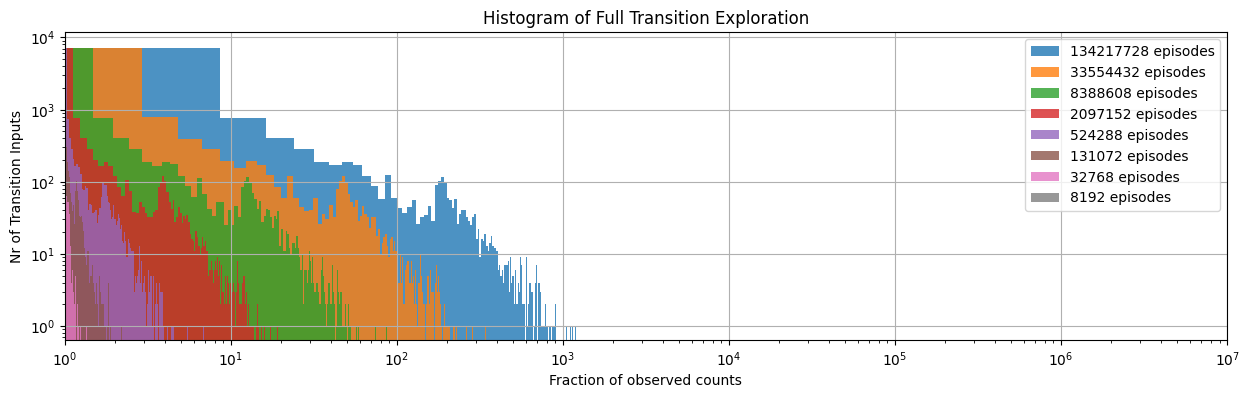

In [48]:
exploration_data = []
iterations = list(full.state_counts.keys()) 
plt.figure(figsize=(15, 4))


for i in [-1, -3, -5, -7, -9, -11, -13, -15]:
    it = iterations[i]
    exploration_per_input = {(i,j): np.sum(full.state_counts[it][i,j]) / n_states for i in range(n_states) for j in range(n_actions)}
    plt.hist(exploration_per_input.values(), bins=200, alpha=0.8, label=f"{it} episodes")  # Plot the histogram
# plt.plot(iterations, exploration_data, label=f"Explored Counts in %")

plt.xlabel('Fraction of observed counts')
plt.ylabel('Nr of Transition Inputs')
plt.title('Histogram of Full Transition Exploration')
plt.legend()
plt.grid(True)
plt.yscale('log', base=10)
plt.xscale('log', base=10)
plt.xlim(left=1, right=1e7)

plt.show()


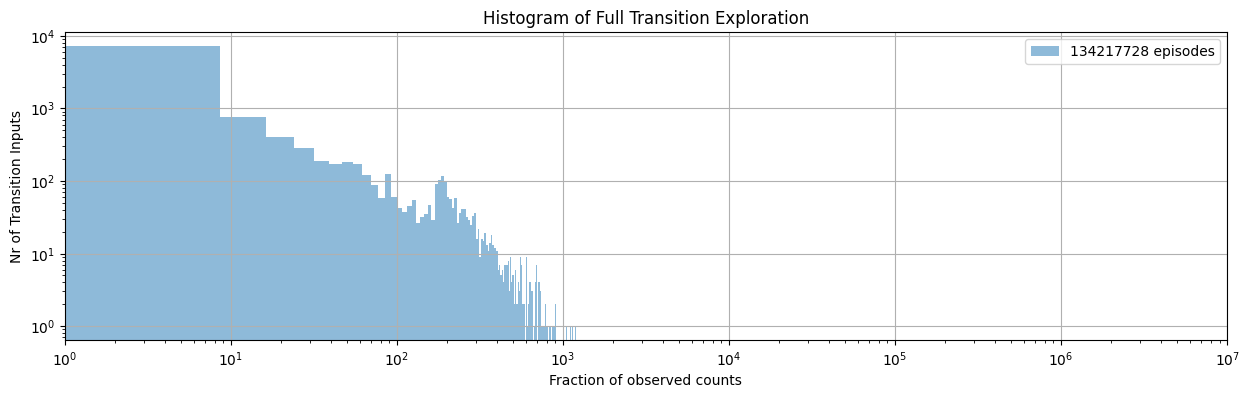

In [49]:
exploration_data = []
iterations = list(full.state_counts.keys()) 
last = iterations[-1]

exploration_per_input = {}
exploration_per_input = {(i,j): np.sum(full.state_counts[last][i,j]) / n_states for i in range(n_states) for j in range(n_actions)}
flat = np.array(list(exploration_per_input.values()))
    

plt.figure(figsize=(15, 4))
plt.hist(exploration_per_input.values(), bins=200, alpha=0.5, label=f"{last} episodes")  # Plot the histogram

# plt.plot(iterations, exploration_data, label=f"Explored Counts in %")

plt.xlabel('Fraction of observed counts')
plt.ylabel('Nr of Transition Inputs')
plt.title('Histogram of Full Transition Exploration')
plt.legend()
plt.grid(True)
plt.yscale('log', base=10)
plt.xscale('log', base=10)
plt.xlim(left=1, right=1e7)

plt.show()


# Plot history

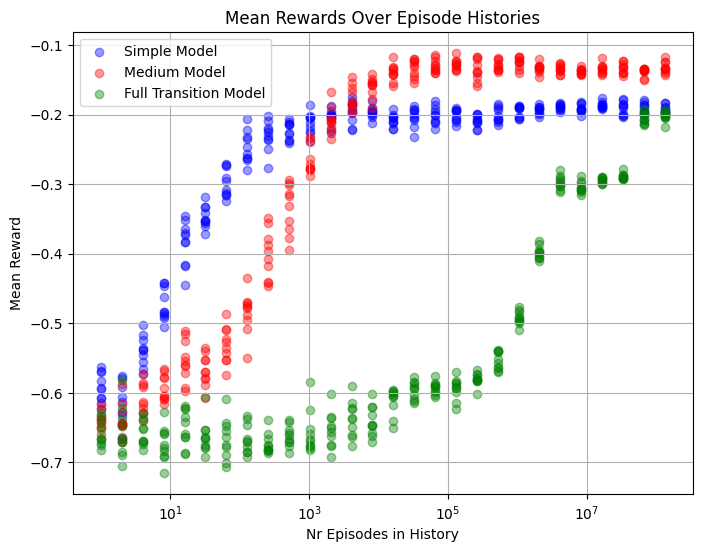

In [50]:
x_simple = [] 
x_medium = [] 
x_full = [] 
y_simple = [] 
y_medium = [] 
y_full = [] 

for iteration, rewards in simple.mean_rewards.items():
    x_simple.extend([iteration] * len(rewards))  
    y_simple.extend(rewards)  
for iteration, rewards in medium.mean_rewards.items():
    x_medium.extend([iteration] * len(rewards))  
    y_medium.extend(rewards)  
for iteration, rewards in full.mean_rewards.items():
    x_full.extend([iteration] * len(rewards))  
    y_full.extend(rewards)  

plt.figure(figsize=(8, 6))
plt.scatter(x_simple, y_simple, color='blue', label='Simple Model', alpha=0.4) 
plt.scatter(x_medium, y_medium, color='red', label='Medium Model', alpha=0.4) 
plt.scatter(x_full, y_full, color='green', label='Full Transition Model', alpha=0.4) 

# Add labels, title, and legend
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Mean Rewards Over Episode Histories')
plt.xscale('log', base=10)
plt.legend()
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()

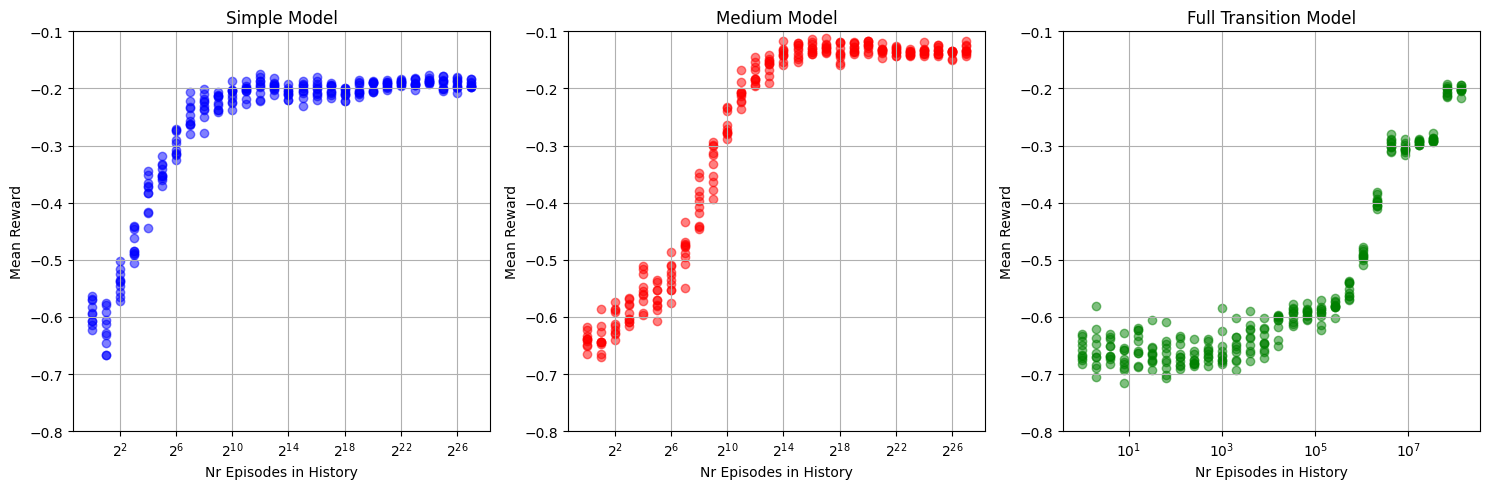

In [51]:
x_simple = [] 
x_medium = [] 
x_full = [] 
y_simple = [] 
y_medium = [] 
y_full = [] 

for iteration, rewards in simple.mean_rewards.items():
    x_simple.extend([iteration] * len(rewards))  
    y_simple.extend(rewards)  
for iteration, rewards in medium.mean_rewards.items():
    x_medium.extend([iteration] * len(rewards))  
    y_medium.extend(rewards)  
for iteration, rewards in full.mean_rewards.items():
    x_full.extend([iteration] * len(rewards))  
    y_full.extend(rewards)  

# Assuming x_simple, x_medium, x_full, y_simple, y_medium, y_full are defined


plt.figure(figsize=(15, 5))

# Plot for Simple Model
plt.subplot(1, 3, 1)  # 3 rows, 1 column, 1st plot
plt.scatter(x_simple, y_simple, color='blue', alpha=0.5)
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Simple Model')
plt.xscale('log', base=2)
plt.ylim(-0.8, -0.1)  # Set y-axis limits
plt.grid(True)

# Plot for Medium Model
plt.subplot(1, 3, 2)  # 3 rows, 1 column, 2nd plot
plt.scatter(x_medium, y_medium, color='red', alpha=0.5)
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Medium Model')
plt.xscale('log', base=2)
plt.ylim(-0.8, -0.1)  # Set y-axis limits
plt.grid(True)

# Plot for Full Model
plt.subplot(1, 3, 3)  # 3 rows, 1 column, 3rd plot
plt.scatter(x_full, y_full, color='green', alpha=0.5)
plt.xlabel('Nr Episodes in History')
plt.ylabel('Mean Reward')
plt.title('Full Transition Model')
plt.xscale('log', base=10)
plt.ylim(-0.8, -0.1)  # Set y-axis limits
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
